In [1]:
%matplotlib inline
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from components.AttractorLayer import AttractorLayer
from components.RadarLoader import RadarLoader
from components.SimulatedRadar import SimulatedRadar
seq_name = "2020-02-28-13-13-43"
%run carrada_utils/scripts/set_path.py 'components/carrada_datasets/'

In [2]:
data_loader = SimulatedRadar()
data = data_loader.get_random_datastream()


In [3]:

TAU = 1  # TODO: I don't know whether this is important
INTENSITY =1.0
BETA =300  # TODO : Check this
SIGMA =3.0 # TODO: Check this
SHIFT = 0.0 # TODO : Check this
CUTOFF_DIST = 10 # TODO : Change this
X_EYE = 1.0
Y_EYE = 1.0


K_INHIB = 3.0


In [4]:
attr_layer = AttractorLayer(
        tau=TAU,
        intensity=INTENSITY,
        cutoff_dist=CUTOFF_DIST,
        sigma=SIGMA,
        shift=SHIFT,
        beta=BETA,
        k=K_INHIB,
        clip=True,
        x_eye=X_EYE,
        y_eye=Y_EYE,
)

attr_layer.set_weights()
attr_layer.save_network(file_path=f"components/network_weights/net_k_{int(K_INHIB)}_beta_{int(BETA)}_sigma_{int(SIGMA)}.npy")

#attr_layer.load_network(file_path="components/network_weights/9_net.npy")

In [5]:
neuron_act = []
for data_entry in data:
    neuron_act.append(
        attr_layer.forward_pass_visualization(
            data_entry.flatten(), number_of_passes=1
        )[0]
    )

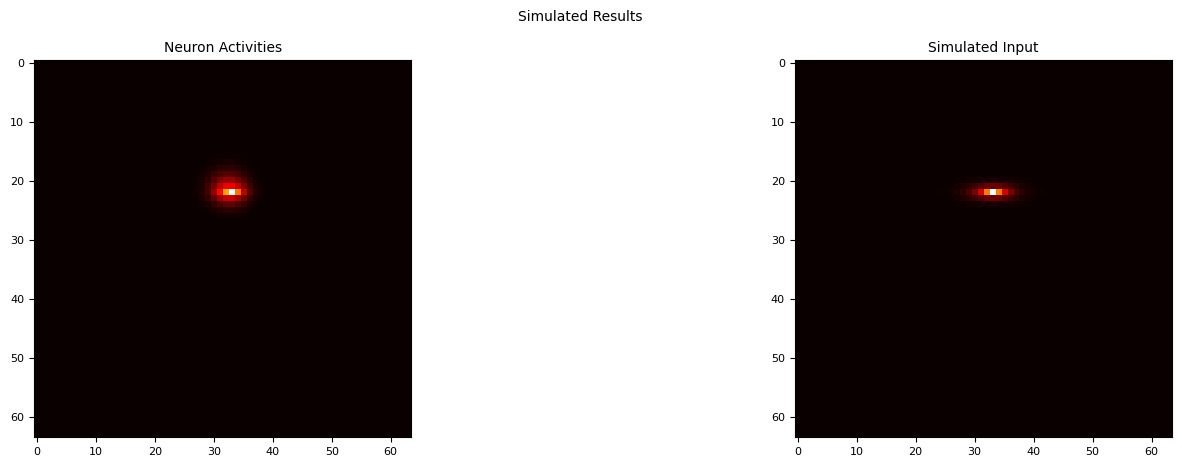

In [6]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(18,5), dpi=100)
fig.suptitle("Simulated Results", fontsize=10)


ax1.tick_params(axis='both',labelsize=8)
ax1.set_title("Neuron Activities",fontsize=10)
ax2.tick_params(axis='both',labelsize=8)
ax2.set_title("Simulated Input",fontsize=10)

cell_act_map = ax1.imshow(np.array(neuron_act[40]), cmap='hot', interpolation='none')
simulated_input_map = ax2.imshow(data[40], cmap='hot', interpolation='none')

plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


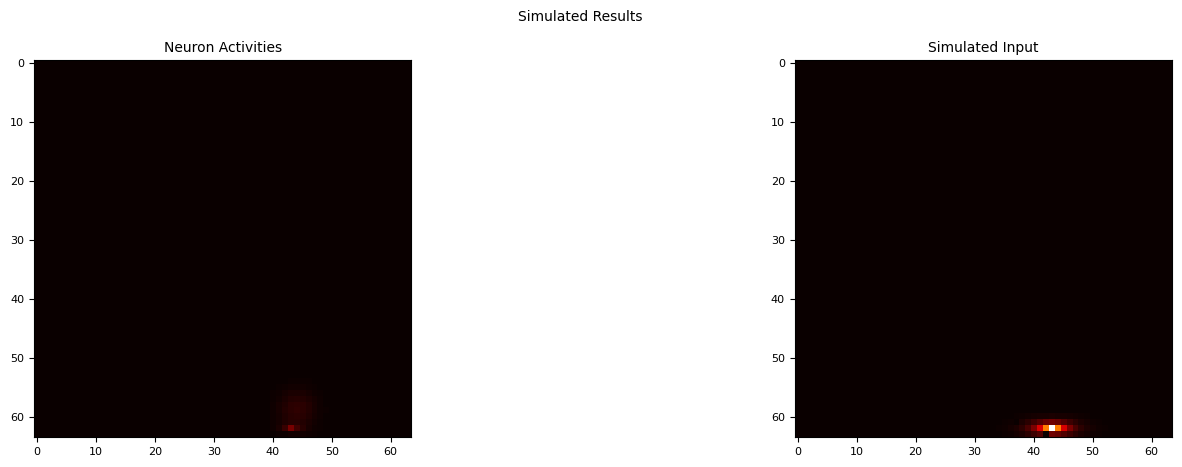

In [7]:


fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(18,5), dpi=100)
fig.suptitle("Simulated Results", fontsize=10)


ax1.tick_params(axis='both',labelsize=8)
ax1.set_title("Neuron Activities",fontsize=10)
ax2.tick_params(axis='both',labelsize=8)
ax2.set_title("Simulated Input",fontsize=10)


cell_act_map = ax1.imshow(np.array(neuron_act[0]), cmap='hot', interpolation='none')
simulated_input_map = ax2.imshow(data[0], cmap='hot', interpolation='none')



def init():
    
    cell_act_map.set_data(np.array(neuron_act[0]))
    simulated_input_map.set_data(np.array(data[0]))
    return [cell_act_map, simulated_input_map]

# animation function.  This is called sequentially
def animate(i):
    cell_act_map.set_data(np.array(neuron_act[i]))
    simulated_input_map.set_data(np.array(data[i]))
    return [cell_act_map, simulated_input_map]


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data)-1, interval=1, blit=True)

anim.save(f"animations/TT_simulated_k_{int(K_INHIB)}_beta_{int(BETA)}_int_{int(INTENSITY)}.gif", fps=10)


#fig.colorbar(cell_dists_map)

#plt.show()